In [1]:
%matplotlib inline
import pandas as pd
import altair as alt
import numpy as np
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

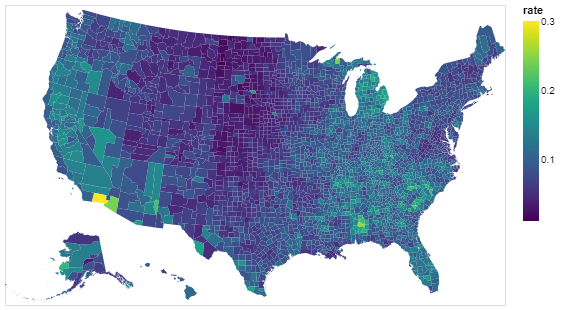

In [2]:
counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url

alt.Chart(counties).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

# World Projections

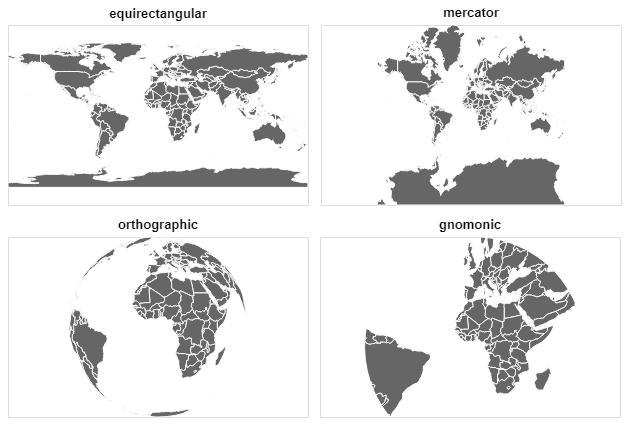

In [3]:
source = alt.topo_feature(data.world_110m.url, 'countries')

base = alt.Chart(source).mark_geoshape(
    fill='#666666',
    stroke='white'
).properties(
    width=300,
    height=180
)

projections = ['equirectangular', 'mercator', 'orthographic', 'gnomonic']
charts = [base.project(proj).properties(title=proj)
          for proj in projections]

alt.vconcat(
    alt.hconcat(*charts[:2]),
    alt.hconcat(*charts[2:])
)